## Descripción Detallada de los Datos
### Sistema de Recomendación de Noticias sobre Clientes con Potencial Comercial

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

clientes = pd.read_csv('C:/Users/dmtor/Desktop/Dataton/clientes.csv')
noticias = pd.read_csv('C:/Users/dmtor/Desktop/Dataton/noticias.csv')
clientes_noticias = pd.read_csv('C:/Users/dmtor/Desktop/Dataton/clientes_noticias.csv')



###  Base de datos de clientes 

* clientes.csv: Archivo con el listado de clientes a consultar, la descripción de su actividad económica y el subsector
* nit: Identificador único del cliente
* nombre: Nombre corporativo del cliente
* desc_ciiu_división: Descripción general de la clasificación Industrial uniforme d todas las actividades económicas
* desc_ciiu_grupo: Descripción por grupo de la clasificación Industrial uniforme d todas las actividades económicas
* desc_ciiu_clase: : Descripción por clase de la clasificación Industrial uniforme d todas las actividades económicas
* subsector: Clasificación de la actividad industrial

Dimensiones: (1507, 6)
Categorias:
nit                   1507
nombre                1506
desc_ciiu_division      81
desc_ciuu_grupo        156
desc_ciiuu_clase       244
subsec                  83
dtype: int64

Datos nulos:
 nit                   0
nombre                0
desc_ciiu_division    0
desc_ciuu_grupo       0
desc_ciiuu_clase      0
subsec                0
dtype: int64

Tipo de datos:
 nit                    int64
nombre                object
desc_ciiu_division    object
desc_ciuu_grupo       object
desc_ciiuu_clase      object
subsec                object
dtype: object
subsec


C:\Users\dmtor\AppData\Local\Temp\ipykernel_8012\459500417.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([shorten_label(label.get_text()) for label in axes.get_xticklabels()])


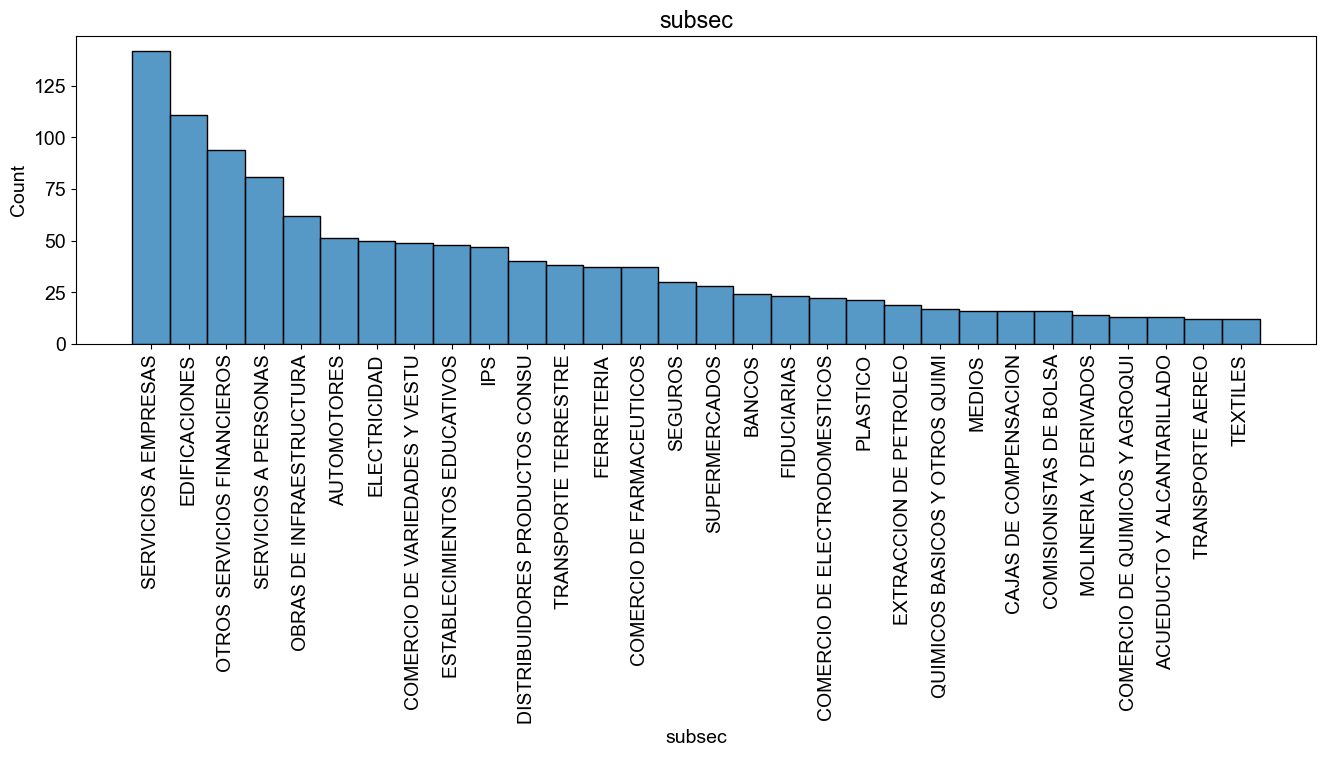

desc_ciiu_division


C:\Users\dmtor\AppData\Local\Temp\ipykernel_8012\459500417.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([shorten_label(label.get_text()) for label in axes.get_xticklabels()])


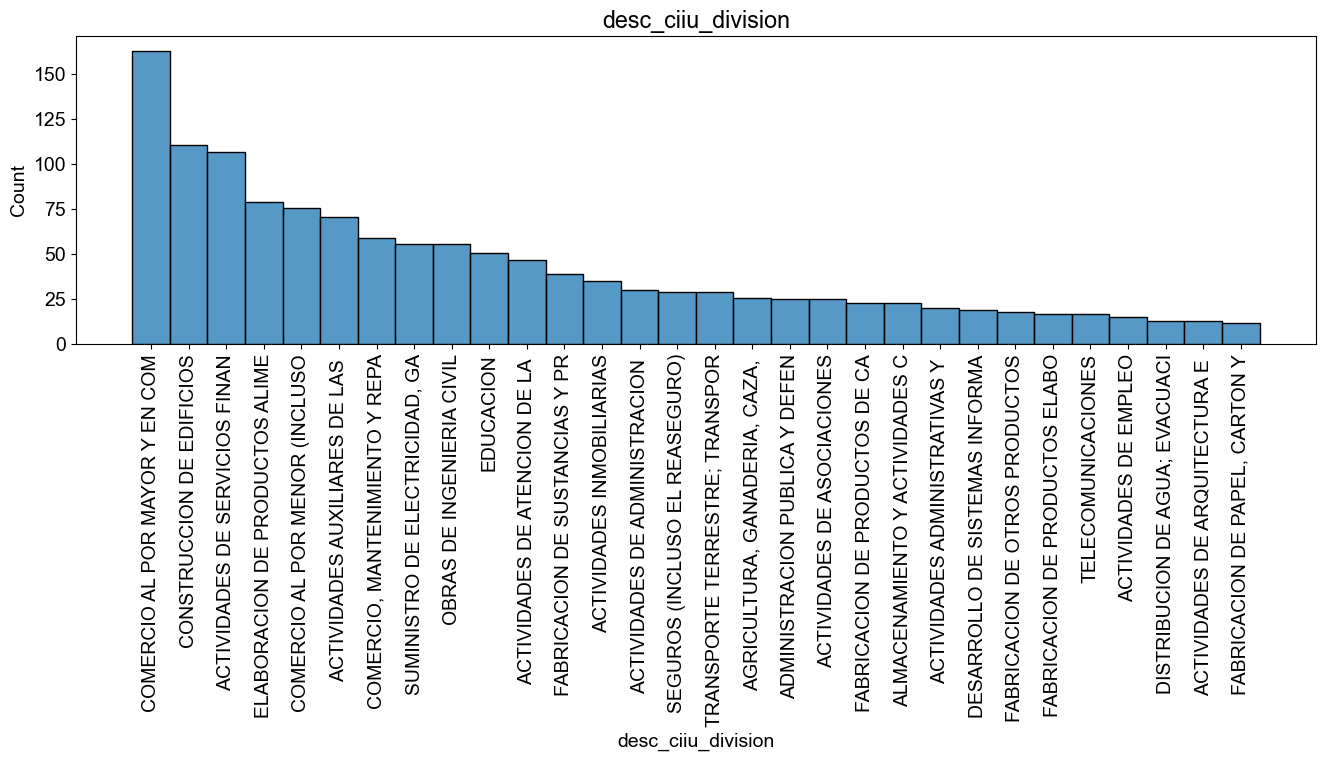

desc_ciuu_grupo


C:\Users\dmtor\AppData\Local\Temp\ipykernel_8012\459500417.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([shorten_label(label.get_text()) for label in axes.get_xticklabels()])


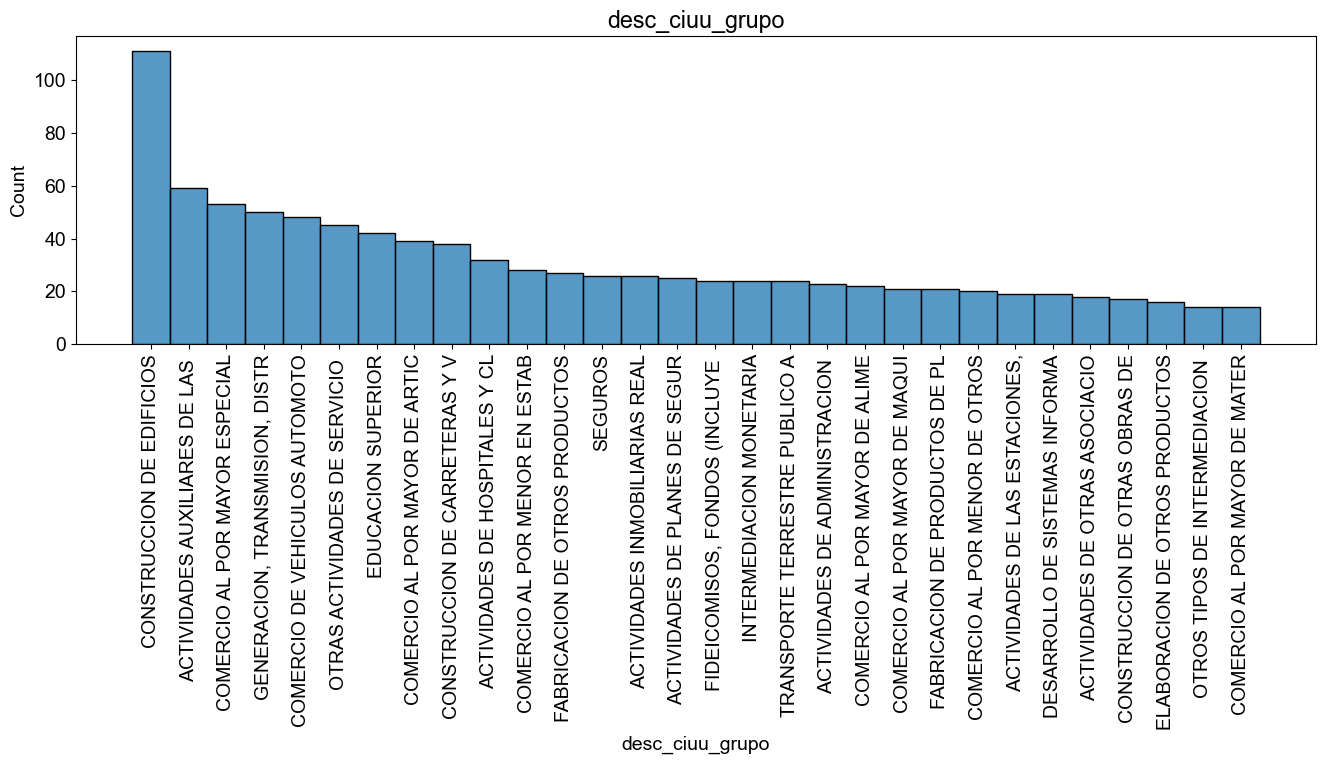

desc_ciiuu_clase


C:\Users\dmtor\AppData\Local\Temp\ipykernel_8012\459500417.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([shorten_label(label.get_text()) for label in axes.get_xticklabels()])


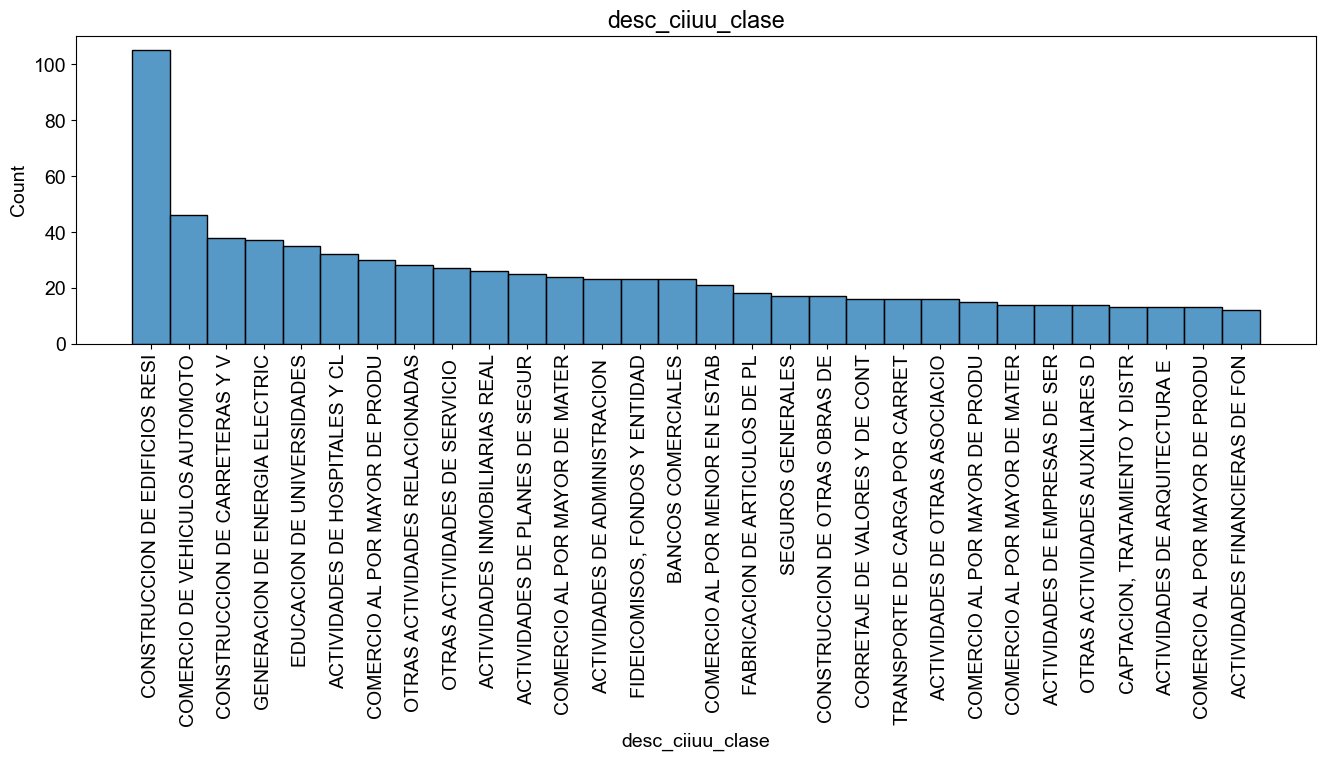

In [182]:
# Estadísticas descriptivas
df = clientes
ini = len(df)
print("Dimensiones:""", str(df.shape))
print('Categorias:')
print(clientes.nunique())
print("\nDatos nulos:\n", str(df.isnull().sum()))
print("\nTipo de datos:\n",str(df.dtypes))

pd= clientes
columnas= ['subsec','desc_ciiu_division', 'desc_ciuu_grupo', 'desc_ciiuu_clase']

for i,column in enumerate(columnas):
    
    val_num = i
    print(column)
    
    dis = ['subsec','desc_ciiu_division', 'desc_ciuu_grupo', 'desc_ciiuu_clase']
    if column not in dis: 
        fig, axes = plt.subplots(1, 2, figsize=(16, 4))
        plt.title(column)
        top_100_categories = df[column].value_counts().nlargest(30).index
        df_filtered = df[df[column].isin(top_100_categories)]
        df_sorted = df_filtered.sort_values(by=column, key=lambda x: x.map(df_filtered[column].value_counts()), ascending=False)
        sns.histplot(data=df_sorted, x= column, kde=True, ax = axes[0], discrete=True)
        plt.title(column)
        sns.boxplot(data = df_sorted, y = df.columns[val_num], ax = axes[1])
        plt.xticks(rotation=90)
        def shorten_label(label):
            return label[:30]
        axes[0].set_xticklabels([shorten_label(label.get_text()) for label in axes[0].get_xticklabels()])
        plt.rcParams['font.family'] = 'arial'
        plt.rcParams['font.size'] = 14
        
        plt.show()
    else:
        fig, axes = plt.subplots(1, 1, figsize=(16, 4))
        plt.title(column)
        top_100_categories = df[column].value_counts().nlargest(30).index
        df_filtered = df[df[column].isin(top_100_categories)]
        df_sorted = df_filtered.sort_values(by=column, key=lambda x: x.map(df_filtered[column].value_counts()), ascending=False)
        sns.histplot(data=df_sorted, x= column, ax = axes, discrete=True)
        plt.title(column)
        plt.xticks(rotation=90)
        def shorten_label(label):
            return label[:30]
        axes.set_xticklabels([shorten_label(label.get_text()) for label in axes.get_xticklabels()])
        plt.rcParams['font.family'] = 'arial'
        plt.rcParams['font.size'] = 14
        
        plt.show()


### noticias.csv

noticias.csv: Contenido de cada una de las noticias consultadas
* new_id: Identificador único de noticias
* news_url_absolute: Url de la noticia encontrada
* news_init_date: Fecha mínima del intevalo de tiempo al que pertenece la noticia
* news_final_date: Fecha máxima del del intevalo de tiempo al que pertenece la noticia
* news_title: Título relacionado a la noticia
* news__text__content: Texto contenido de la noticia

Dimensiones: (23377, 11)
Categorias:
news_id              23377
news_url_absolute    23116
news_init_date           2
news_final_date          2
news_title           22772
news_text_content    21621
duration                 1
interval_duration        1
month                    1
year                     1
day                      2
dtype: int64

Datos nulos:
 news_id              0
news_url_absolute    0
news_init_date       0
news_final_date      0
news_title           0
news_text_content    0
duration             0
interval_duration    0
month                0
year                 0
day                  0
dtype: int64

Tipo de datos:
 news_id                       object
news_url_absolute             object
news_init_date        datetime64[ns]
news_final_date       datetime64[ns]
news_title                    object
news_text_content             object
duration             timedelta64[ns]
interval_duration              int64
month                          int64
year                  

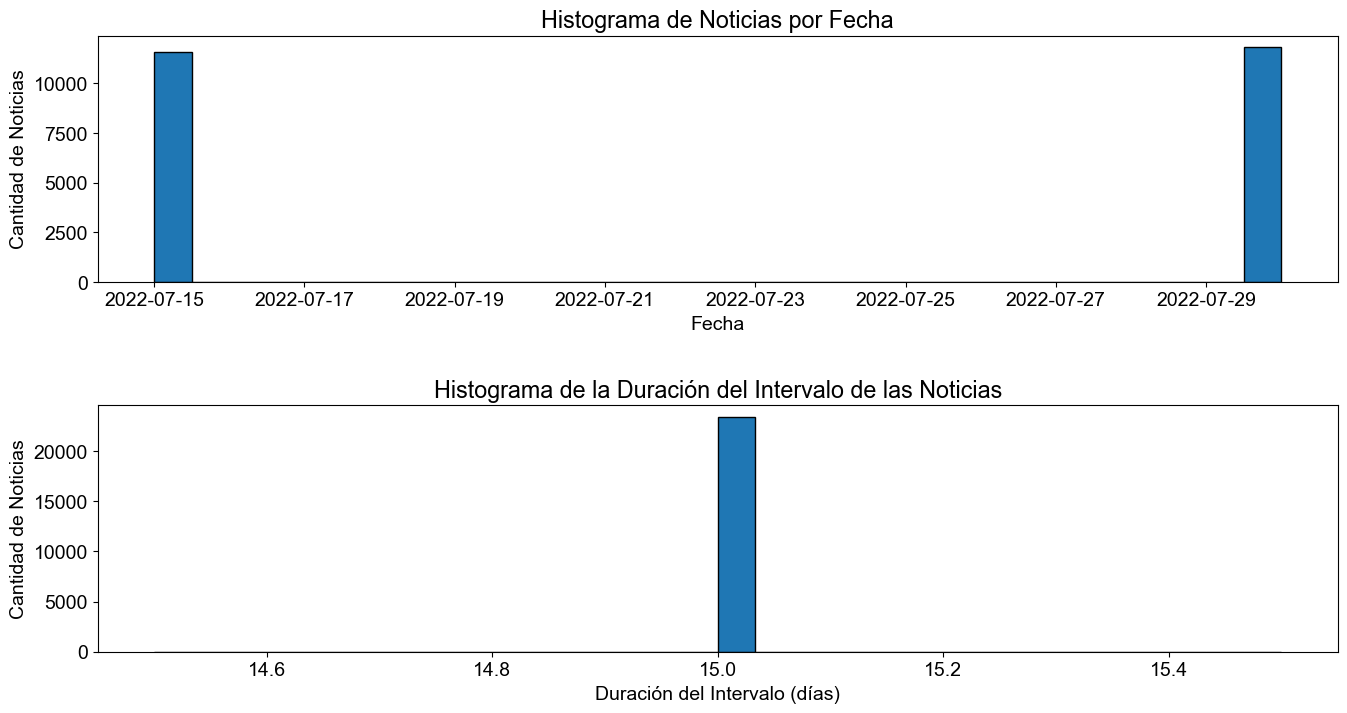

In [184]:
#Estadísticas descriptivas
df= noticias
ini = len(df)
# Conteo de valores únicos
print("Dimensiones:""", str(df.shape))
print('Categorias:')
print(df.nunique())
print("\nDatos nulos:\n", str(df.isnull().sum()))
print("\nTipo de datos:\n",str(df.dtypes))

df['interval_duration'] = (df['news_final_date'] - df['news_init_date']).dt.days
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
#noticias por fecha
ax1.hist(df['news_init_date'], bins=30, edgecolor='black')
ax1.set_title('Histograma de Noticias por Fecha')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de Noticias')
# duración del intervalo
ax2.hist(df['interval_duration'], bins=30, edgecolor='black')
ax2.set_title('Histograma de la Duración del Intervalo de las Noticias')
ax2.set_xlabel('Duración del Intervalo (días)')
ax2.set_ylabel('Cantidad de Noticias')
plt.subplots_adjust(hspace=0.5)
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 14
plt.show()


### clientes_noticias.csv

clientes_noticias.csv: Relación entre cliente y las noticias consultadas mediante el proceso de descarga de información
* new_id: Identificador único del cliente
* news_url_absolute: url de la noticia encontrada
* news_init_date: Fecha mínima del intevalo de tiempo al que pertenece la noticia
* news_final_date: Fecha máxima del del intevalo de tiempo al que pertenece la noticia

In [156]:
#Estadísticas descriptivas

df= clientes_noticias

ini = len(df)
# Conteo de valores únicos
print("Dimensiones:""", str(df.shape))
print('Categorias:')
print(df.nunique())
#from colorama import init, Fore, Back, Style
#df['Direction'] = df['Direction'].map({'Up': 1, 'Down': 0})
print("\nDatos nulos:\n", str(df.isnull().sum()))
print("\nTipo de datos:\n",str(df.dtypes))

Dimensiones: (74709, 5)
Categorias:
nit                   1508
news_id              23377
news_url_absolute    23116
news_init_date           2
news_final_date          2
dtype: int64

Datos nulos:
 nit                  0
news_id              0
news_url_absolute    0
news_init_date       0
news_final_date      0
dtype: int64

Tipo de datos:
 nit                   int64
news_id              object
news_url_absolute    object
news_init_date       object
news_final_date      object
dtype: object


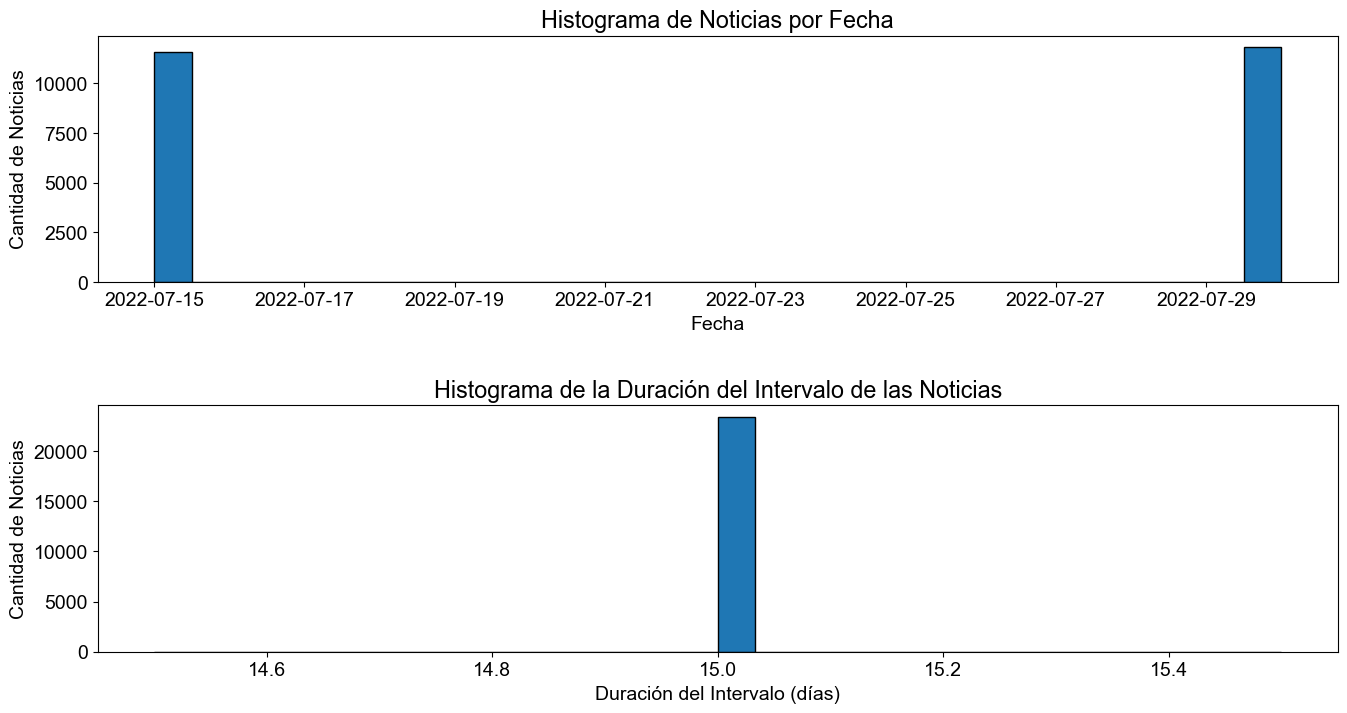

In [186]:

df['interval_duration'] = (df['news_final_date'] - df['news_init_date']).dt.days
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
#noticias por fecha
ax1.hist(df['news_init_date'], bins=30, edgecolor='black')
ax1.set_title('Histograma de Noticias por Fecha')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de Noticias')
# duración del intervalo
ax2.hist(df['interval_duration'], bins=30, edgecolor='black')
ax2.set_title('Histograma de la Duración del Intervalo de las Noticias')
ax2.set_xlabel('Duración del Intervalo (días)')
ax2.set_ylabel('Cantidad de Noticias')
plt.subplots_adjust(hspace=0.5)
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 14
plt.show()


Estadísticas descriptivas de la distribución de noticias por cliente:
count    1508.000000
mean       49.541777
std        34.210484
min         4.000000
25%        27.000000
50%        36.000000
75%        60.000000
max       187.000000
Name: news_id, dtype: float64


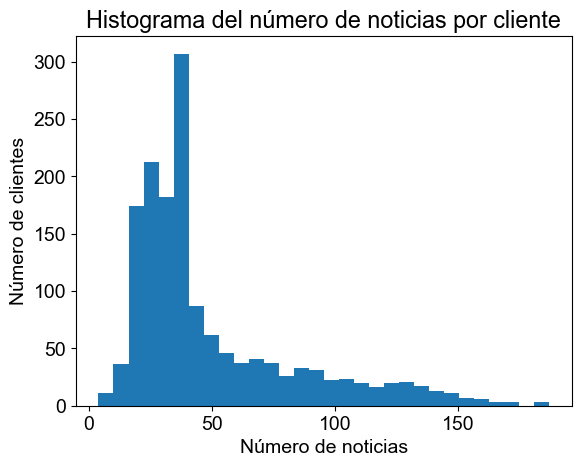

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga la base de datos de clientes_noticias
#clientes_noticias = pd.read_csv('clientes_noticias.csv')

# Agrupa los datos por cliente y cuenta el número de noticias por cliente
noticias_por_cliente = clientes_noticias.groupby('nit')['news_id'].count()

# Calcula estadísticas descriptivas de la distribución de noticias por cliente
print('Estadísticas descriptivas de la distribución de noticias por cliente:')
print(noticias_por_cliente.describe())

# Crea un histograma del número de noticias por cliente
plt.hist(noticias_por_cliente, bins=30)
plt.xlabel('Número de noticias')
plt.ylabel('Número de clientes')
plt.title('Histograma del número de noticias por cliente')
plt.show()